In [1]:
import pathlib

import torch
import torch.utils.data

from torchvision import models, datasets, tv_tensors
from torchvision.transforms import v2
import matplotlib.pyplot as plt

torch.manual_seed(22)

# This loads fake data for illustration purposes of this example. In practice, you'll have
# to replace this with the proper data.
# If you're trying to run that on collab, you can download the assets and the
# helpers from https://github.com/pytorch/vision/tree/main/gallery/
ROOT = pathlib.Path("../data")
IMAGES_PATH = str(ROOT / "train")
ANNOTATIONS_PATH = str(ROOT / "annotations_qualitex_reviewed_22_03_2024.json")

from helpers import plot

In [2]:
dataset = datasets.CocoDetection(IMAGES_PATH, ANNOTATIONS_PATH)

sample = dataset[0]
img, target = sample
print(f"{type(img) = }\n{type(target) = }\n{type(target[0]) = }\n{target[0].keys() = }")

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
type(img) = <class 'PIL.Image.Image'>
type(target) = <class 'list'>
type(target[0]) = <class 'dict'>
target[0].keys() = dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])


In [3]:
dataset = datasets.wrap_dataset_for_transforms_v2(dataset, target_keys=("boxes", "labels", "masks"))

sample = dataset[2]
img, target = sample
print(f"{type(img) = }\n{type(target) = }\n{target.keys() = }")
print(f"{type(target['boxes']) = }\n{type(target['labels']) = }\n{type(target['masks']) = }")

type(img) = <class 'PIL.Image.Image'>
type(target) = <class 'dict'>
target.keys() = dict_keys(['boxes', 'masks', 'labels'])
type(target['boxes']) = <class 'torchvision.tv_tensors._bounding_boxes.BoundingBoxes'>
type(target['labels']) = <class 'torch.Tensor'>
type(target['masks']) = <class 'torchvision.tv_tensors._mask.Mask'>


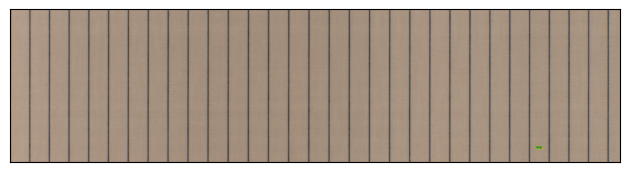

In [4]:
plot([dataset[0]])

In [5]:
transforms = v2.Compose(
    [
        v2.ToImage(),
        v2.RandomHorizontalFlip(p=0.5),
        v2.RandomVerticalFlip(p=0.5),
        v2.Resize((1024, 1024)),
        v2.ColorJitter(brightness=0.5, contrast=0.5, hue=0.5),
        v2.SanitizeBoundingBoxes(),
        v2.ToDtype(torch.float32, scale=True),
        v2.ToTensor(),
    ]
)

/Users/wilson/.local/share/virtualenvs/aqc-textilesam-XoaMiJZ5/lib/python3.9/site-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [6]:
dataset = datasets.CocoDetection(IMAGES_PATH, ANNOTATIONS_PATH, transforms=transforms)
dataset = datasets.wrap_dataset_for_transforms_v2(dataset, target_keys=["boxes", "labels", "masks"])

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [7]:
sample = dataset[0]
img, target = sample
print(f"{type(img) = }\n{type(target) = }\n{target.keys() = }")
print(f"{type(target['boxes']) = }\n{type(target['labels']) = }\n{type(target['masks']) = }")

type(img) = <class 'torchvision.tv_tensors._image.Image'>
type(target) = <class 'dict'>
target.keys() = dict_keys(['boxes', 'masks', 'labels'])
type(target['boxes']) = <class 'torchvision.tv_tensors._bounding_boxes.BoundingBoxes'>
type(target['labels']) = <class 'torch.Tensor'>
type(target['masks']) = <class 'torchvision.tv_tensors._mask.Mask'>


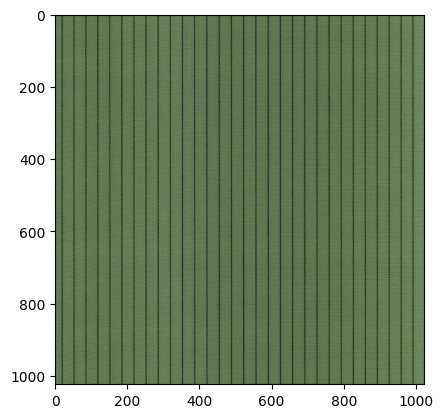

In [9]:
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

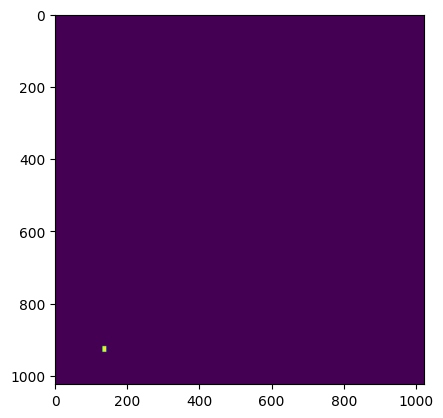

In [10]:
plt.imshow(target["masks"].numpy().sum(axis=0))

In [11]:
data_loader = torch.utils.data.DataLoader(dataset)

In [15]:
for step, (img, target) in enumerate(data_loader):
    print(img, target)
    break

tensor([[[[0.2902, 0.7804, 0.8471,  ..., 0.8784, 0.8353, 0.8588],
          [0.4078, 0.7373, 0.8392,  ..., 0.8902, 0.8471, 0.8627],
          [0.6471, 0.8000, 0.8902,  ..., 0.8392, 0.8275, 0.8235],
          ...,
          [0.4431, 0.8275, 0.9608,  ..., 0.8157, 0.8275, 0.8157],
          [0.3176, 0.6549, 0.8784,  ..., 0.8784, 0.8588, 0.8980],
          [0.2000, 0.4235, 0.7882,  ..., 0.9333, 0.9137, 0.9843]],

         [[0.2235, 0.5569, 0.7294,  ..., 0.8627, 0.8039, 0.9137],
          [0.2196, 0.4824, 0.6824,  ..., 0.8392, 0.7843, 0.8745],
          [0.2000, 0.4667, 0.6510,  ..., 0.7137, 0.6980, 0.7333],
          ...,
          [0.2275, 0.7059, 0.7922,  ..., 0.6588, 0.6510, 0.6980],
          [0.2235, 0.6706, 0.7765,  ..., 0.7020, 0.6824, 0.6980],
          [0.1725, 0.5098, 0.7137,  ..., 0.7490, 0.7373, 0.7373]],

         [[0.1216, 0.2235, 0.4784,  ..., 0.6078, 0.5922, 0.6353],
          [0.1137, 0.2549, 0.5020,  ..., 0.6235, 0.6000, 0.6275],
          [0.0980, 0.4471, 0.6235,  ..., 0

In [16]:
target["masks"].shape

torch.Size([1, 1, 1024, 1024])